In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

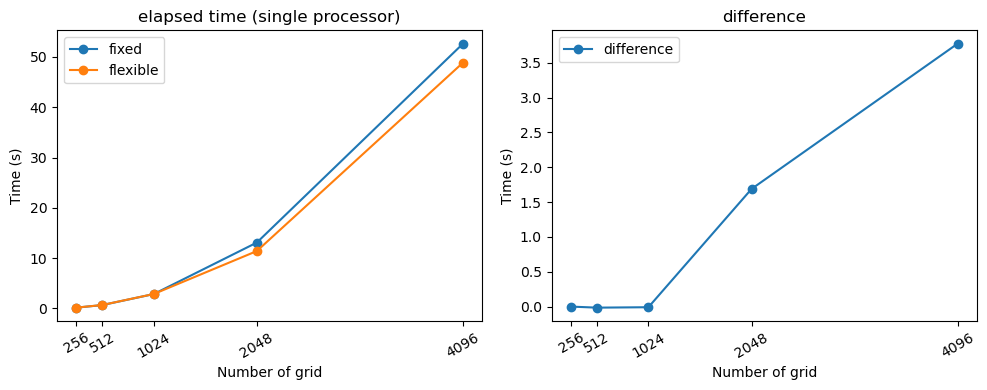

In [ ]:

gg = np.array([256, 512, 1024, 2048, 4096])
fixed_time = np.array([161, 667, 2857, 13103, 52674])
flexible_time = np.array([161, 682, 2866, 11414, 48897])
difference = fixed_time - flexible_time

name_list = ["elapsed time (single processor)", "difference"]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for i, ax in enumerate(axes):
    if i == 0:
        ax.plot(gg, fixed_time * 1e-3, "o-", label="fixed")
        ax.plot(gg, flexible_time * 1e-3, "o-", label="flexible")
    else:
        ax.plot(gg, difference * 1e-3, "o-", label="difference")

    ax.set_title(name_list[i])
    ax.set_xlabel("Number of grid")
    ax.set_ylabel("Time (s)")
    ax.set_xticks(gg)
    ax.tick_params(axis='x', rotation=30)

    ax.legend()

plt.tight_layout()
plt.show()



# single processor validation

In [17]:
x0 = -1
xN = 1
y0 = -1
yN = 1

nx = 128
ny = 128

nx1 = nx+2
ny1 = ny+2

npx = 2
npy = 2 

mx = nx/npx
my = ny/npy

dx = (xN-x0)/nx
dy = (yN-y0)/ny

x = np.zeros(nx+2)
y = np.zeros(ny+2)

for i in range(nx+2):
    if i==0:
        x[i] = x0
    elif i==nx+1:
        x[i] = xN
    else:
        x[i] = x0 + dx/2 + dx*(i-1)
for j in range(ny+2):
    if j==0:
        y[j] = y0
    elif j==ny+1:
        y[j] = yN
    else:
        y[j] = y0 + dy/2 + dy*(j-1)

8.546516309116909e-05


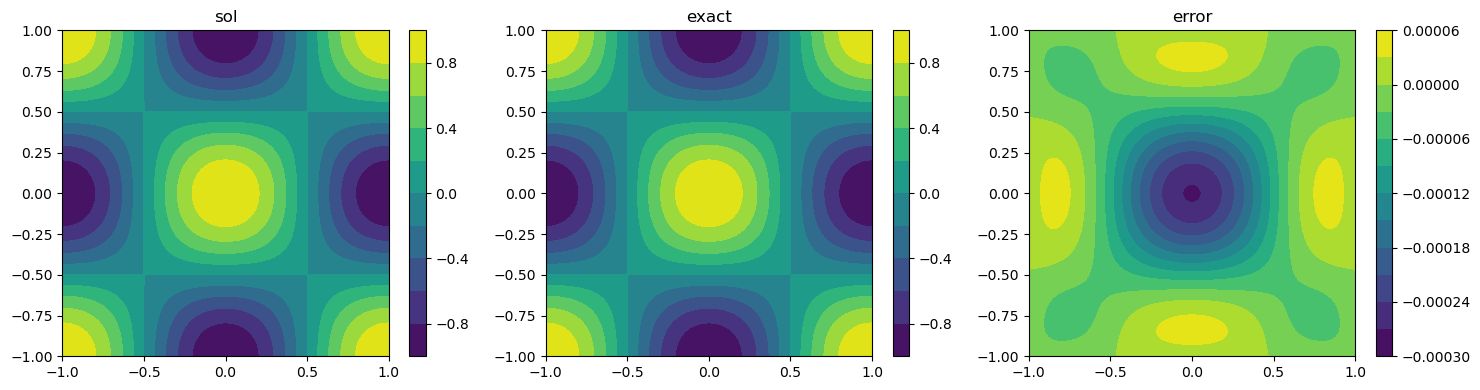

In [19]:
folder_name = "results"
file_name = "theta"

t = 1
solution_single = np.array(pd.read_csv(f"{folder_name}/{file_name}_single.csv", header=None))

X, Y = np.meshgrid(x, y)
exact_solution = np.zeros_like(X)
for j in range(0, ny+2):
    for i in range(0, nx+2):
        exact_solution[j, i] = np.cos(np.pi*x[i])*np.cos(np.pi*y[j]) + np.sin(np.pi*x[i])*np.sin(np.pi*y[j]) * np.exp(-2*np.pi**2 * t)

error = exact_solution - solution_single
solution_list = [solution_single, exact_solution, error]
name_list = ["sol", "exact", "error"]
print(np.sqrt(np.sum(error**2) / nx / ny))

# plot --------------------------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1행 3열 subplot
for i, ax in enumerate(axes):
    cs = ax.contourf(X, Y, solution_list[i], levels=10)
    fig.colorbar(cs, ax=ax)
    ax.set_title(f'{name_list[i]}')

plt.tight_layout()
plt.show()

[2.02513844 2.00247049 2.00030858]


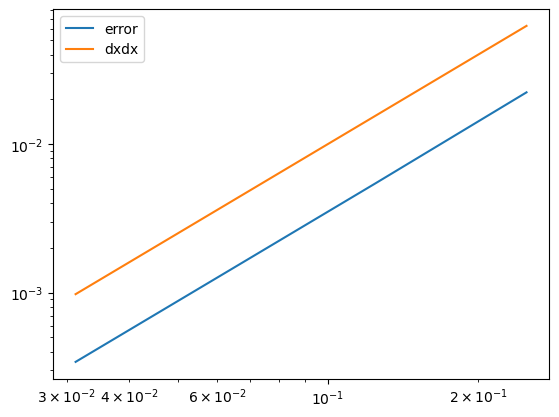

In [70]:
# Dirichlet

dx_list = np.array([2/8, 2/16, 2/32, 2/64])
error_list = np.array([0.022307404405280843, 0.0054805182235907295, 0.0013677853402741067, 0.00034187320253294996])

slope = ( np.log(error_list[1:]) - np.log(error_list[:-1]) ) / ( np.log(dx_list[1:]) - np.log(dx_list[:-1]) )
print(slope)

plt.loglog(dx_list, error_list, label="error")
plt.loglog(dx_list, dx_list**2, label="dxdx")
plt.legend()

[2.15307589 2.09478339 2.01431215]


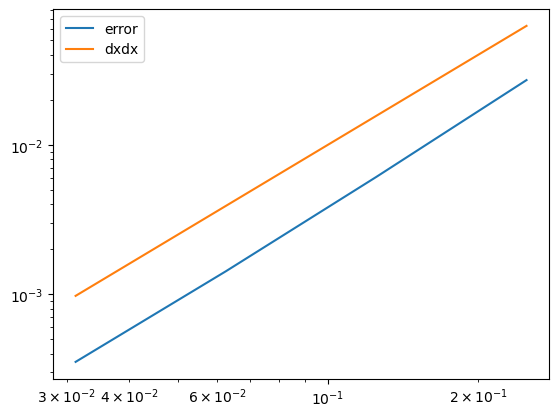

In [61]:
# periodic

dx_list = np.array([2/8, 2/16, 2/32, 2/64])
error_list = np.array([0.02711337282164026, 0.0060959742026956585, 0.0014270871216378357, 0.00035324994968958276])

slope = ( np.log(error_list[1:]) - np.log(error_list[:-1]) ) / ( np.log(dx_list[1:]) - np.log(dx_list[:-1]) )
print(slope)

plt.loglog(dx_list, error_list, label="error")
plt.loglog(dx_list, dx_list**2, label="dxdx")
plt.legend()

# PaScaL_TDMA (Dirichlet) single, many validation

In [39]:
x0 = -1
xN = 1
y0 = -1
yN = 1

nx = 64
ny = 64

nx1 = nx+2
ny1 = ny+2

npx = 2
npy = 2 

mx = nx/npx
my = ny/npy

dx = (xN-x0)/nx
dy = (yN-y0)/ny

x = np.zeros(nx+2)
y = np.zeros(ny+2)

for i in range(nx+2):
    if i==0:
        x[i] = x0
    elif i==nx+1:
        x[i] = xN
    else:
        x[i] = x0 + dx/2 + dx*(i-1)
for j in range(ny+2):
    if j==0:
        y[j] = y0
    elif j==ny+1:
        y[j] = yN
    else:
        y[j] = y0 + dy/2 + dy*(j-1)

In [40]:
folder_name = "results"
file_name = "theta"
n_step = 1

solution = np.zeros((ny+2, nx+2))
for j in range(npy):
    for i in range(npx):
        temp = np.array(pd.read_csv(f"{folder_name}/{file_name}_{j}{i}.csv", header=None))
        
        j_idx_sta = int(j*mx) + 1
        j_idx_end = int((j+1)*mx) + 1
        i_idx_sta = int(i*mx) + 1 
        i_idx_end = int((i+1)*mx) + 1
        
        solution[j_idx_sta:j_idx_end, i_idx_sta:i_idx_end] = temp[1:-1, 1:-1]

# exact_solution = np.array(pd.read_csv(f"{folder_name}/{file_name}_single.csv", header=None))

X, Y = np.meshgrid(x, y)

t = 1
exact_solution = np.zeros((ny+2, nx+2))
for j in range(0, ny+2):
    for i in range(0, nx+2):
        exact_solution[i, j] = np.cos(np.pi*x[i])*np.cos(np.pi*y[j]) + np.sin(np.pi*x[i])*np.sin(np.pi*y[j]) * np.exp(-2*np.pi**2 * t)

# folder_name = "results"
# file_name = "theta"
# temp00 = np.array(pd.read_csv(f"{folder_name}/{file_name}_{0}{0}{n_step}.csv", header=None))
# temp10 = np.array(pd.read_csv(f"{folder_name}/{file_name}_{1}{0}{n_step}.csv", header=None))
# temp01 = np.array(pd.read_csv(f"{folder_name}/{file_name}_{0}{1}{n_step}.csv", header=None))
# temp11 = np.array(pd.read_csv(f"{folder_name}/{file_name}_{1}{1}{n_step}.csv", header=None))
# temp00[:, -1] - temp01[:, 1], temp00[:, -2] - temp01[:, 0], temp10[:, -1] - temp11[:, 1], temp10[:, -2] - temp11[:, 0]

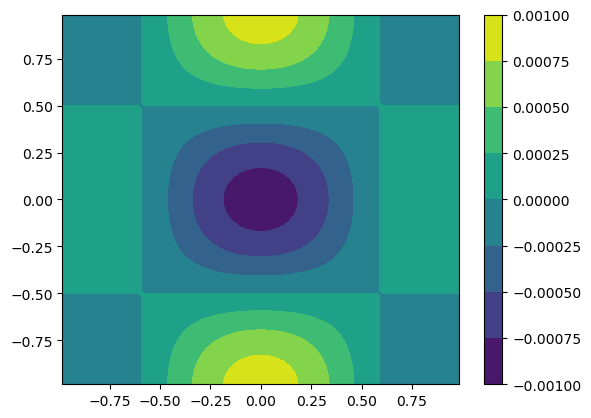

In [41]:
error = exact_solution[1:-1, 1:-1] - solution[1:-1, 1:-1]

#plt.title("Error between single processor and multi processor")
plt.contourf(X[1:-1, 1:-1], Y[1:-1, 1:-1], error)
plt.colorbar()

0.0003338898794540554


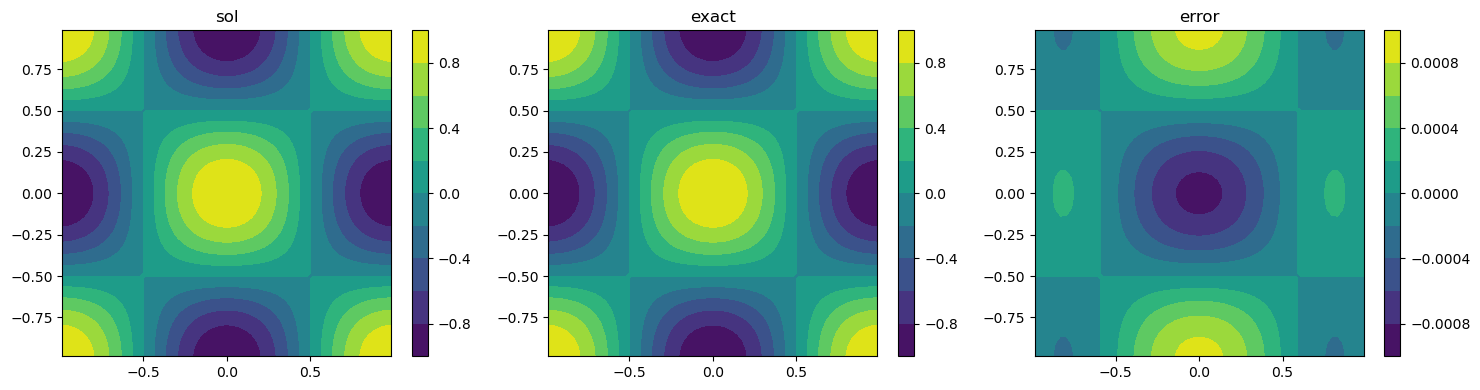

In [42]:
error = exact_solution[1:-1, 1:-1] - solution[1:-1, 1:-1]
solution_list = [solution[1:-1, 1:-1], exact_solution[1:-1, 1:-1], error]
name_list = ["sol", "exact", "error"]
print(np.sqrt(np.sum(error**2) / nx / ny))

# plot --------------------------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1행 3열 subplot
for i, ax in enumerate(axes):
    cs = ax.contourf(X[1:-1, 1:-1], Y[1:-1, 1:-1], solution_list[i], levels=10)
    fig.colorbar(cs, ax=ax)
    ax.set_title(f'{name_list[i]}')

plt.tight_layout()
plt.show()

[2.02513844 2.00247049 2.00030858]


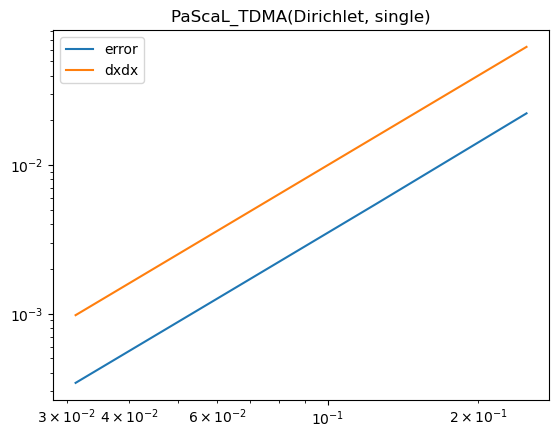

In [382]:
# single

dx_list = np.array([2/8, 2/16, 2/32, 2/64])
error_list = np.array([0.022307404405280826, 0.005480518223591088, 0.0013677853402735238, 0.0003418732025331749])

slope = ( np.log(error_list[1:]) - np.log(error_list[:-1]) ) / ( np.log(dx_list[1:]) - np.log(dx_list[:-1]) )
print(slope)

plt.title("PaScaL_TDMA(Dirichlet, single)")
plt.loglog(dx_list, error_list, label="error")
plt.loglog(dx_list, dx_list**2, label="dxdx")
plt.legend()

[2.02513844 2.00247049 2.00030858]


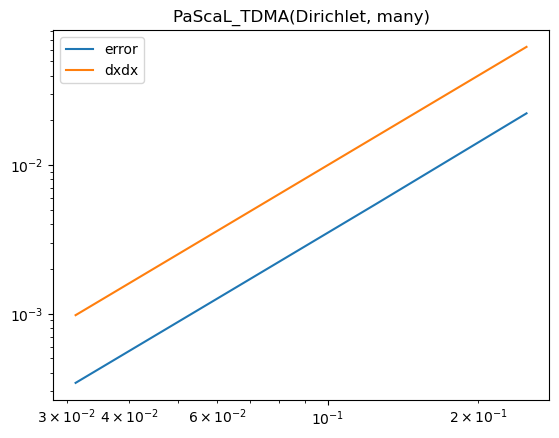

In [392]:
# many

dx_list = np.array([2/8, 2/16, 2/32, 2/64])
error_list = np.array([0.02230740440528085, 0.005480518223591115, 0.001367785340273494, 0.00034187320253319825])

slope = ( np.log(error_list[1:]) - np.log(error_list[:-1]) ) / ( np.log(dx_list[1:]) - np.log(dx_list[:-1]) )
print(slope)

plt.title("PaScaL_TDMA(Dirichlet, many)")
plt.loglog(dx_list, error_list, label="error")
plt.loglog(dx_list, dx_list**2, label="dxdx")
plt.legend()

# PaScaL_TDMA (Dirichlet) single, many Performence

In [414]:
# single
times_1024 = np.array([2857, 1774, 951, 586])
times_2048 = np.array([13103, 7405, 3902, 2299])

# 프로세서 개수
procs = np.array([1, 2, 4, 8])

# speed-up 계산
speedup_1024 = times_1024[0] / times_1024
speedup_2048 = times_2048[0] / times_2048

# efficiency 계산
efficiency_1024 = speedup_1024 / procs
efficiency_2048 = speedup_2048 / procs

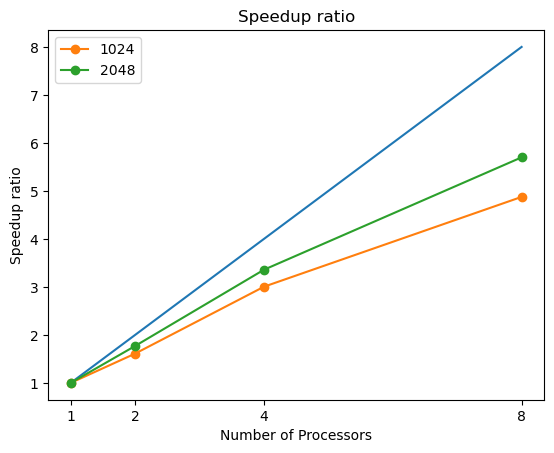

In [415]:
plt.title('Speedup ratio')
plt.xlabel('Number of Processors')
plt.ylabel('Speedup ratio')
plt.plot(procs, procs)
plt.xticks([1, 2, 4, 8])
plt.plot(procs, speedup_1024, "o-", label="1024")
plt.plot(procs, speedup_2048, "o-", label="2048")
plt.legend()

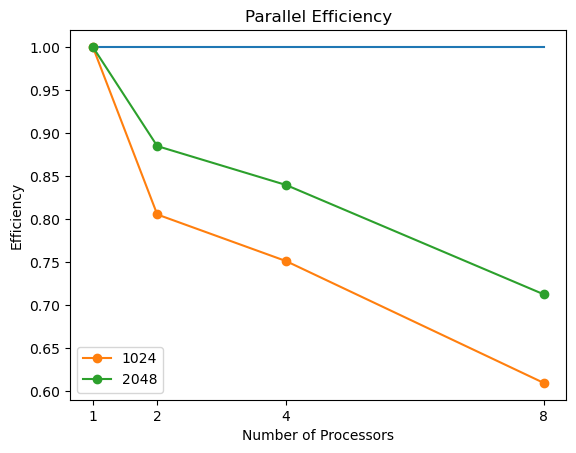

In [416]:
plt.title('Parallel Efficiency')
plt.xlabel('Number of Processors')
plt.ylabel('Efficiency')
plt.plot(procs, np.ones(procs.shape[0]))
plt.xticks([1, 2, 4, 8])
plt.plot(procs, efficiency_1024, "o-", label="1024")
plt.plot(procs, efficiency_2048, "o-", label="2048")
plt.legend()

In [ ]:
# many
times_1024 = np.array([2857, 1793, 974, 597])
times_2048 = np.array([13103, 7360, 4308, 3036])

# 프로세서 개수
procs = np.array([1, 2, 4, 8])

# speed-up 계산
speedup_1024 = times_1024[0] / times_1024
speedup_2048 = times_2048[0] / times_2048

# efficiency 계산
efficiency_1024 = speedup_1024 / procs
efficiency_2048 = speedup_2048 / procs

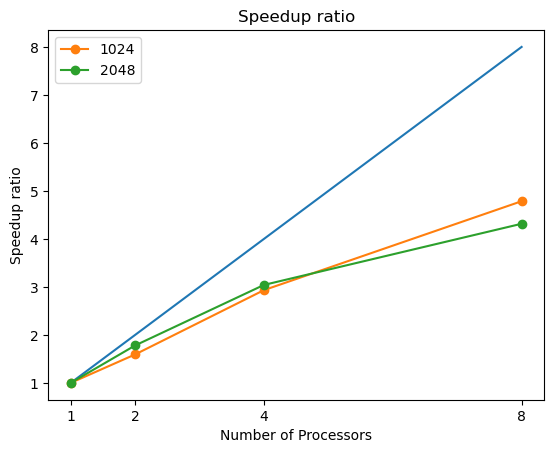

In [412]:
plt.title('Speedup ratio')
plt.xlabel('Number of Processors')
plt.ylabel('Speedup ratio')
plt.plot(procs, procs)
plt.xticks([1, 2, 4, 8])
plt.plot(procs, speedup_1024, "o-", label="1024")
plt.plot(procs, speedup_2048, "o-", label="2048")
plt.legend()

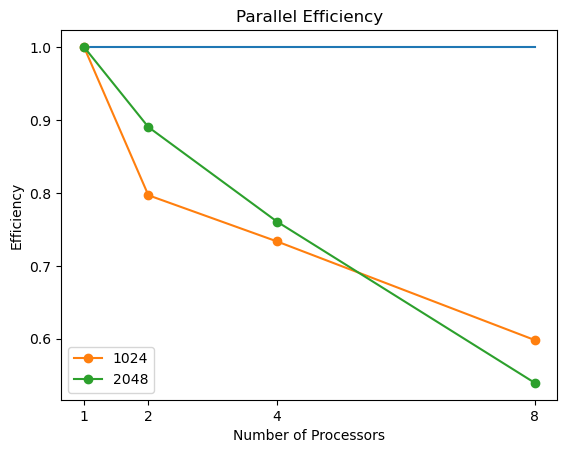

In [413]:
plt.title('Parallel Efficiency')
plt.xlabel('Number of Processors')
plt.ylabel('Efficiency')
plt.plot(procs, np.ones(procs.shape[0]))
plt.xticks([1, 2, 4, 8])
plt.plot(procs, efficiency_1024, "o-", label="1024")
plt.plot(procs, efficiency_2048, "o-", label="2048")
plt.legend()

# PaScaL_TDMA (Periodic) single, many validation

In [455]:
x0 = -1
xN = 1
y0 = -1
yN = 1

nx = 8
ny = 8

nx1 = nx+2
ny1 = ny+2

npx = 2
npy = 2 

mx = nx/npx
my = ny/npy

dx = (xN-x0)/nx
dy = (yN-y0)/ny

x = np.zeros(nx+2)
y = np.zeros(ny+2)

for i in range(nx+2):
    if i==0:
        x[i] = x0
    elif i==nx+1:
        x[i] = xN
    else:
        x[i] = x0 + dx/2 + dx*(i-1)
for j in range(ny+2):
    if j==0:
        y[j] = y0
    elif j==ny+1:
        y[j] = yN
    else:
        y[j] = y0 + dy/2 + dy*(j-1)

In [456]:
folder_name = "results"
file_name = "theta"
n_step = 1

solution = np.zeros((ny+2, nx+2))
for j in range(npy):
    for i in range(npx):
        temp = np.array(pd.read_csv(f"{folder_name}/{file_name}_{j}{i}.csv", header=None))
        
        j_idx_sta = int(j*mx) + 1
        j_idx_end = int((j+1)*mx) + 1
        i_idx_sta = int(i*mx) + 1 
        i_idx_end = int((i+1)*mx) + 1
        
        solution[j_idx_sta:j_idx_end, i_idx_sta:i_idx_end] = temp[1:-1, 1:-1]

# exact_solution = np.array(pd.read_csv(f"{folder_name}/{file_name}_single.csv", header=None))

X, Y = np.meshgrid(x, y)

t = 1
exact_solution = np.zeros((ny+2, nx+2))
for j in range(0, ny+2):
    for i in range(0, nx+2):
        exact_solution[i, j] = np.cos(np.pi*x[i])*np.cos(np.pi*y[j]) + np.sin(np.pi*x[i])*np.sin(np.pi*y[j]) * np.exp(-2*np.pi**2 * t)

# folder_name = "results"
# file_name = "theta"
# temp00 = np.array(pd.read_csv(f"{folder_name}/{file_name}_{0}{0}{n_step}.csv", header=None))
# temp10 = np.array(pd.read_csv(f"{folder_name}/{file_name}_{1}{0}{n_step}.csv", header=None))
# temp01 = np.array(pd.read_csv(f"{folder_name}/{file_name}_{0}{1}{n_step}.csv", header=None))
# temp11 = np.array(pd.read_csv(f"{folder_name}/{file_name}_{1}{1}{n_step}.csv", header=None))
# temp00[:, -1] - temp01[:, 1], temp00[:, -2] - temp01[:, 0], temp10[:, -1] - temp11[:, 1], temp10[:, -2] - temp11[:, 0]

0.02248005980768629


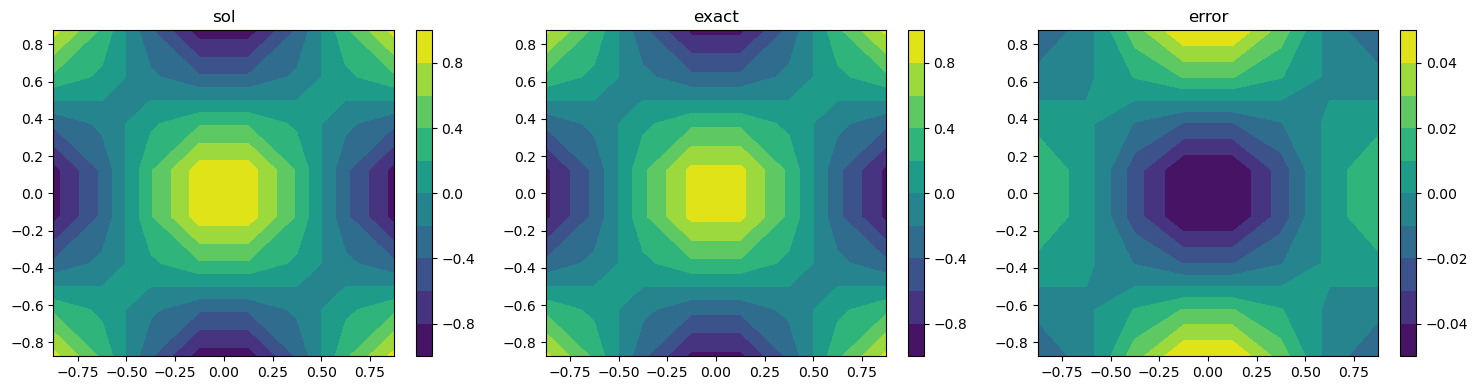

In [457]:
error = exact_solution[1:-1, 1:-1] - solution[1:-1, 1:-1]
solution_list = [solution[1:-1, 1:-1], exact_solution[1:-1, 1:-1], error]
name_list = ["sol", "exact", "error"]
print(np.sqrt(np.sum(error**2) / nx / ny))

# plot --------------------------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1행 3열 subplot
for i, ax in enumerate(axes):
    cs = ax.contourf(X[1:-1, 1:-1], Y[1:-1, 1:-1], solution_list[i], levels=10)
    fig.colorbar(cs, ax=ax)
    ax.set_title(f'{name_list[i]}')

plt.tight_layout()
plt.show()

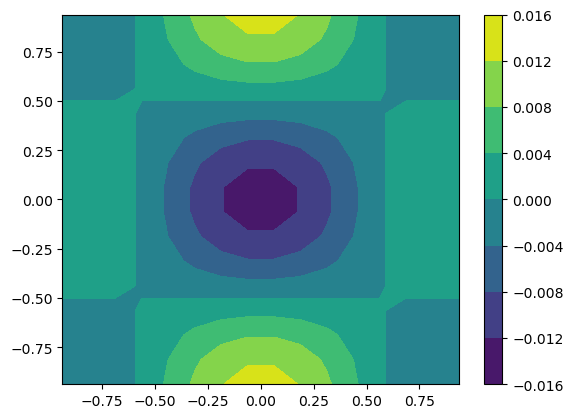

In [452]:
error = exact_solution[1:-1, 1:-1] - solution[1:-1, 1:-1]

#plt.title("Error between single processor and multi processor")
plt.contourf(X[1:-1, 1:-1], Y[1:-1, 1:-1], error)
plt.colorbar()

[2.05780541 2.01238312 2.00294116]


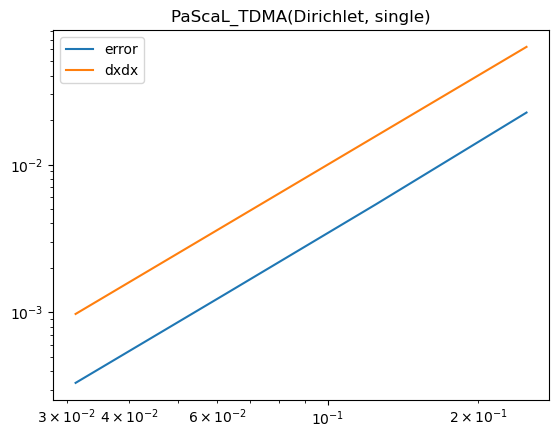

In [453]:
# single

dx_list = np.array([2/8, 2/16, 2/32, 2/64])
error_list = np.array([0.022480059807686324, 0.005399285685504229, 0.0013382850460904277, 0.00033388987945403567])

slope = ( np.log(error_list[1:]) - np.log(error_list[:-1]) ) / ( np.log(dx_list[1:]) - np.log(dx_list[:-1]) )
print(slope)

plt.title("PaScaL_TDMA(Dirichlet, single)")
plt.loglog(dx_list, error_list, label="error")
plt.loglog(dx_list, dx_list**2, label="dxdx")
plt.legend()

[2.05780541 2.01238312 2.00294116]


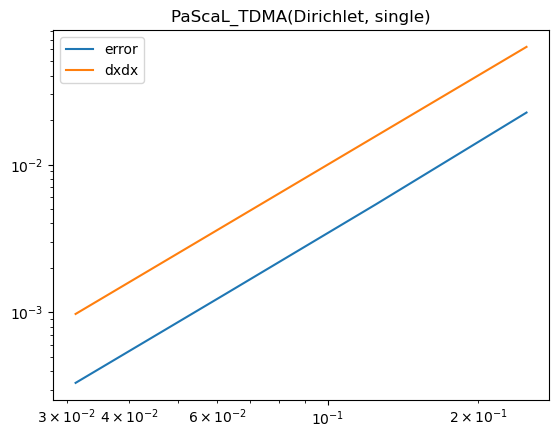

In [458]:
# many

dx_list = np.array([2/8, 2/16, 2/32, 2/64])
error_list = np.array([0.02248005980768629, 0.00539928568550424, 0.0013382850460904063, 0.0003338898794540554])

slope = ( np.log(error_list[1:]) - np.log(error_list[:-1]) ) / ( np.log(dx_list[1:]) - np.log(dx_list[:-1]) )
print(slope)

plt.title("PaScaL_TDMA(Dirichlet, single)")
plt.loglog(dx_list, error_list, label="error")
plt.loglog(dx_list, dx_list**2, label="dxdx")
plt.legend()

# PaScaL_TDMA (Periodic) single, many Performence

In [462]:
# single
times_1024 = np.array([2877, 1799, 944, 630])
times_2048 = np.array([12989, 7241, 3803, 2259])

# 프로세서 개수
procs = np.array([1, 2, 4, 8])

# speed-up 계산
speedup_1024 = times_1024[0] / times_1024
speedup_2048 = times_2048[0] / times_2048

# efficiency 계산
efficiency_1024 = speedup_1024 / procs
efficiency_2048 = speedup_2048 / procs

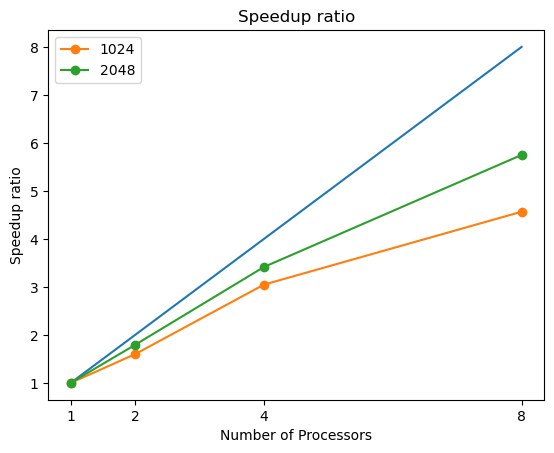

In [463]:
plt.title('Speedup ratio')
plt.xlabel('Number of Processors')
plt.ylabel('Speedup ratio')
plt.plot(procs, procs)
plt.xticks([1, 2, 4, 8])
plt.plot(procs, speedup_1024, "o-", label="1024")
plt.plot(procs, speedup_2048, "o-", label="2048")
plt.legend()

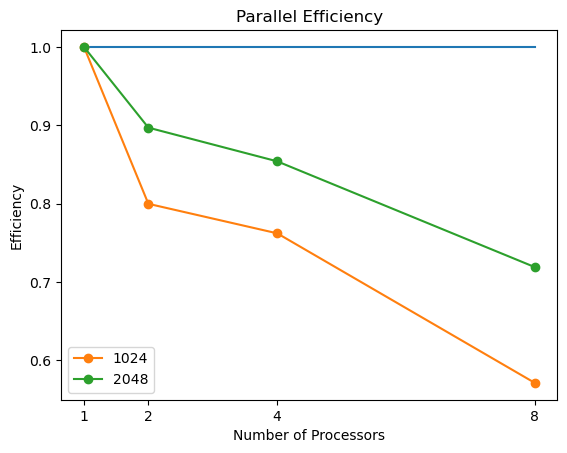

In [464]:
plt.title('Parallel Efficiency')
plt.xlabel('Number of Processors')
plt.ylabel('Efficiency')
plt.plot(procs, np.ones(procs.shape[0]))
plt.xticks([1, 2, 4, 8])
plt.plot(procs, efficiency_1024, "o-", label="1024")
plt.plot(procs, efficiency_2048, "o-", label="2048")
plt.legend()

In [468]:
# many
times_1024 = np.array([2877, 1735, 966, 595])
times_2048 = np.array([12989, 7425, 4265, 3044])

# 프로세서 개수
procs = np.array([1, 2, 4, 8])

# speed-up 계산
speedup_1024 = times_1024[0] / times_1024
speedup_2048 = times_2048[0] / times_2048

# efficiency 계산
efficiency_1024 = speedup_1024 / procs
efficiency_2048 = speedup_2048 / procs

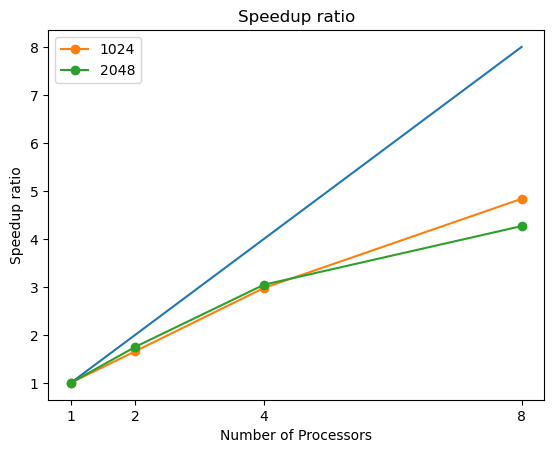

In [469]:
plt.title('Speedup ratio')
plt.xlabel('Number of Processors')
plt.ylabel('Speedup ratio')
plt.plot(procs, procs)
plt.xticks([1, 2, 4, 8])
plt.plot(procs, speedup_1024, "o-", label="1024")
plt.plot(procs, speedup_2048, "o-", label="2048")
plt.legend()

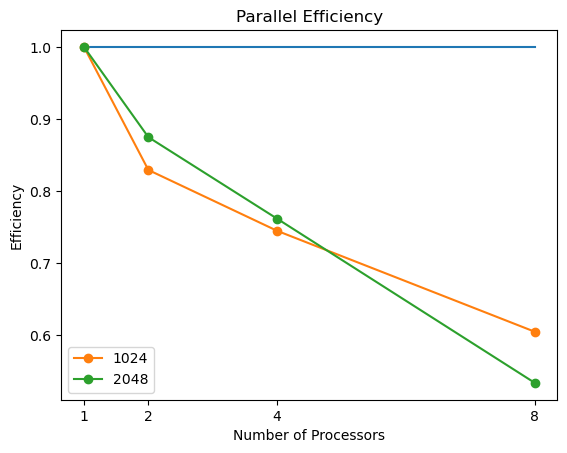

In [470]:
plt.title('Parallel Efficiency')
plt.xlabel('Number of Processors')
plt.ylabel('Efficiency')
plt.plot(procs, np.ones(procs.shape[0]))
plt.xticks([1, 2, 4, 8])
plt.plot(procs, efficiency_1024, "o-", label="1024")
plt.plot(procs, efficiency_2048, "o-", label="2048")
plt.legend()